# CNN in Keras: Introduction

* MNIST example
* CNN concepts: tensor, 1D and 2D convolution, filter/kernel, pooling
* CNN img classification example

## Keras CNN example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from keras.datasets import mnist

In [8]:
(X_train,y_train), (X_test,y_test) = mnist.load_data('/tmp/mnist.npz')

11493376/11490434 [==============================] - 21s 2us/step


In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

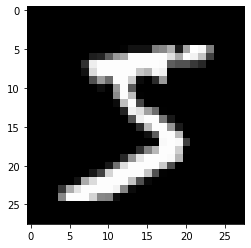

In [11]:
#imshow for numerical data as img
plt.imshow(X_train[0],cmap = 'gray')

#### Reshapìng to 2D

In [12]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

#### Normalize data

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [14]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
from keras.utils.np_utils import to_categorical

In [16]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [18]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### Model

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics=['accuracy'])

In [22]:
h = model.fit(X_train, 
              y_train_cat, 
              batch_size = 12, 
              epochs = 10, 
              verbose = 2, 
              validation_split = 0.3)

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 22s - loss: 0.2841 - accuracy: 0.9218 - val_loss: 0.2196 - val_accuracy: 0.9502
Epoch 2/10
 - 22s - loss: 0.1983 - accuracy: 0.9579 - val_loss: 0.3576 - val_accuracy: 0.9432
Epoch 3/10
 - 22s - loss: 0.2018 - accuracy: 0.9630 - val_loss: 0.2576 - val_accuracy: 0.9484
Epoch 4/10
 - 23s - loss: 0.2206 - accuracy: 0.9661 - val_loss: 0.3911 - val_accuracy: 0.9499
Epoch 5/10
 - 22s - loss: 0.2480 - accuracy: 0.9683 - val_loss: 0.4827 - val_accuracy: 0.9413
Epoch 6/10
 - 21s - loss: 0.2669 - accuracy: 0.9678 - val_loss: 0.3991 - val_accuracy: 0.9614
Epoch 7/10
 - 20s - loss: 0.2594 - accuracy: 0.9712 - val_loss: 0.6180 - val_accuracy: 0.9421
Epoch 8/10
 - 20s - loss: 0.2825 - accuracy: 0.9727 - val_loss: 0.6410 - val_accuracy: 0.9381
Epoch 9/10
 - 20s - loss: 0.2866 - accuracy: 0.9727 - val_loss: 0.5617 - val_accuracy: 0.9529
Epoch 10/10
 - 20s - loss: 0.3035 - accuracy: 0.9730 - v

In [28]:
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

Text(0.5, 0, 'Epochs')

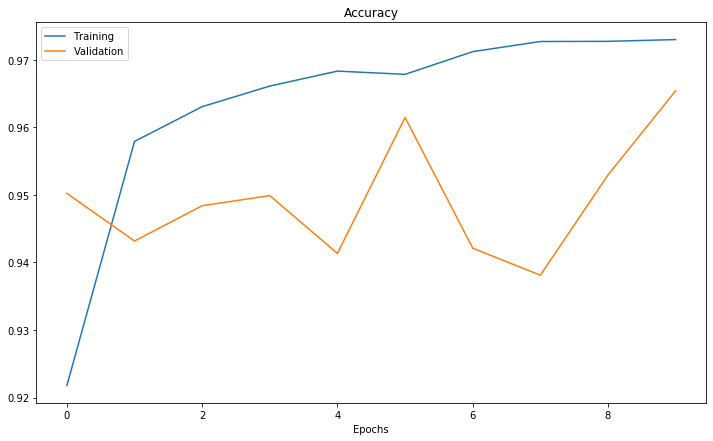

In [31]:
plt.figure(figsize = (12,7))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [32]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy * 100

10000/10000 [==============================] - 0s 45us/step


96.50999903678894

### CNN concepts

#### Random tensor

In [33]:
A = np.random.randint(10, size = (2, 3, 4, 5))
B = np.random.randint(10, size = (2, 3))

In [34]:
A

array([[[[0, 2, 1, 3, 5],
         [3, 1, 2, 6, 6],
         [7, 2, 3, 6, 3],
         [2, 4, 0, 1, 5]],

        [[3, 8, 9, 1, 2],
         [2, 0, 9, 3, 4],
         [0, 5, 0, 9, 0],
         [6, 2, 3, 7, 8]],

        [[1, 7, 9, 2, 3],
         [0, 1, 0, 0, 0],
         [9, 5, 0, 8, 3],
         [2, 5, 2, 3, 0]]],


       [[[9, 4, 5, 2, 8],
         [5, 4, 2, 1, 5],
         [0, 2, 9, 6, 0],
         [9, 3, 0, 6, 8]],

        [[2, 8, 3, 7, 0],
         [6, 4, 8, 3, 1],
         [0, 3, 0, 1, 4],
         [1, 4, 8, 3, 5]],

        [[6, 4, 3, 1, 6],
         [6, 6, 4, 3, 3],
         [3, 4, 7, 4, 3],
         [8, 2, 3, 7, 1]]]])

#### Random color image

In [35]:
img = np.random.randint(255, 
                        size = (4, 4, 3),
                        dtype = 'uint8')
img

array([[[118, 183, 241],
        [ 86,  25, 126],
        [ 32, 178, 225],
        [ 63,  94,  50]],

       [[158,  65,  24],
        [ 37, 106, 121],
        [110, 169, 102],
        [222, 200, 130]],

       [[ 67,  61, 153],
        [ 21,  90, 245],
        [132, 227, 177],
        [ 79,  38,  19]],

       [[109,  70, 250],
        [ 39, 160, 142],
        [228,  85, 144],
        [ 36, 124,  36]]], dtype=uint8)

Text(0.5, 1.0, 'Blue channel')

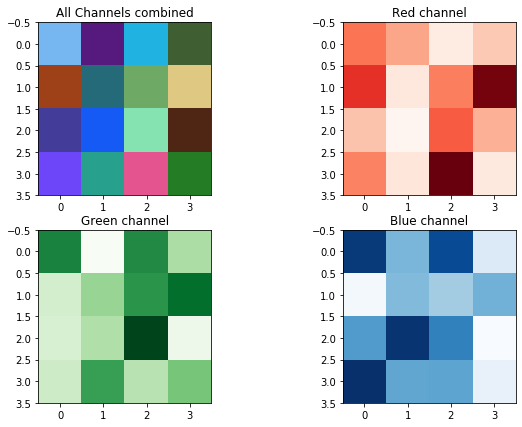

In [36]:
plt.figure(figsize = (10, 7))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], 
           cmap = 'Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], 
           cmap = 'Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], 
           cmap = 'Blues')
plt.title("Blue channel")

### 1D Convolution example

Convolution is a mathematical operation on two functions (f and g) that produces a third function expressing how the shape of one is modified by the other. 

The term convolution refers to both the result function and to the process of computing it. 

It is defined as the integral of the product of the two functions after one is reversed and shifted. 

And the integral is evaluated for all values of shift, producing the convolution function.

In [37]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

b = np.array([-1, 1], dtype='float32')

c = np.convolve(a, b)

In [38]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

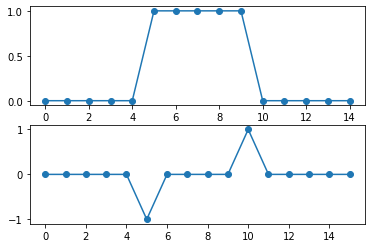

In [39]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(c, 'o-')

### 2D Convolution example

The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. 
    
This kernel “slides” o
ver the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel.

The kernel repeats this process for every location it slides over, converting a 2D matrix of features into yet another 2D matrix of features. The output features are essentially, the weighted sums (with the weights being the values of the kernel itself) of the input features located roughly in the same location of the output pixel on the input layer.

Whether or not an input feature falls within this “roughly same location”, gets determined directly by whether it’s in the area of the kernel that produced the output or not. This means the size of the kernel directly determines how many (or few) input features get combined in the production of a new output feature.

In [40]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

img = misc.ascent()

In [41]:
img.shape

(512, 512)

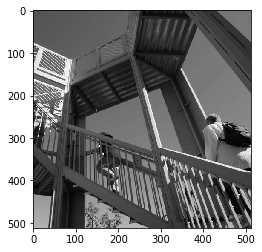

In [42]:
plt.imshow(img, 
           cmap = 'gray')

In [43]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

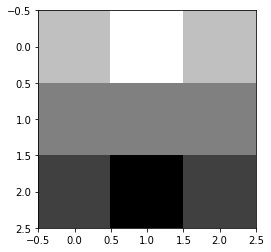

In [44]:
plt.imshow(h_kernel, 
           cmap = 'gray')

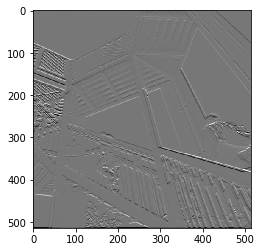

In [45]:
res = convolve2d(img, h_kernel)

plt.imshow(res, 
           cmap = 'gray')

### Simple convolutional network in Keras

In [46]:
from keras.layers import Conv2D

In [54]:
img.shape

(512, 512)

#### Reshaping

In [47]:
img_tensor = img.reshape((1, 512, 512, 1)) # (number images,hight,width,number of color channels)

#### Model

In [48]:
model = Sequential()
#One convolutional layer
model.add(Conv2D(filters = 1,  # one node
                 kernel_size = (3, 3), #filter
                 strides = (2,1), 
                 input_shape = (512, 512, 1)))
model.compile('adam', 'mse')

#### Training

In [50]:
img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 255, 510, 1)

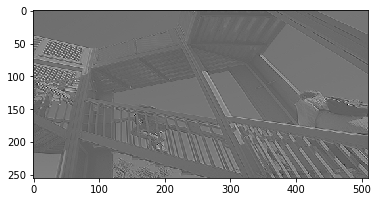

In [51]:
img_pred = img_pred_tensor[0, :, :, 0] #getting dimensional img to plot
plt.imshow(img_pred, 
           cmap = 'gray')

In [52]:
#Filter/kernel

weights = model.get_weights()

weights[0].shape #hight, width,chanel in input,chanel in output

(3, 3, 1, 1)

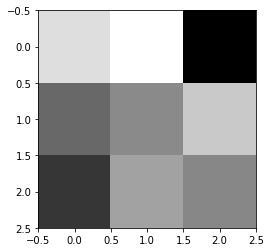

In [53]:
plt.imshow(weights[0][:, :, 0, 0], 
           cmap = 'gray')

#### Creating a filter/kernel

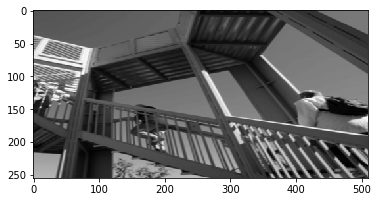

In [55]:
weights[0] = np.ones(weights[0].shape) #creating kernel

model.set_weights(weights)  #fit kernel to model

img_pred_tensor = model.predict(img_tensor) #training

img_pred = img_pred_tensor[0, :, :, 0] #extract img

plt.imshow(img_pred,    #display
           cmap = 'gray')

In [56]:
#
model = Sequential()
model.add(Conv2D(filters = 1, 
                 kernel_size = (3, 3), 
                 input_shape = (512, 512, 1), 
                 padding='same')) #img will be padding with 0s and pixel on the borders will not be lose. default stride 1,1, not losing img shape
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)


img_pred_tensor.shape

(1, 512, 512, 1)

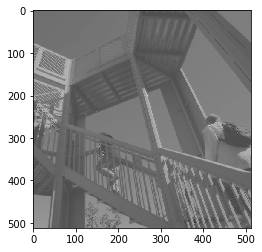

In [57]:

img_pred_tensor = img_pred_tensor[0, :, :, 0]

plt.imshow(img_pred_tensor, 
           cmap = 'gray')

### Pooling in Keras

Reduce img size and retain the relevant i nformation: get the maximum(by default) values in a patch of pixels 

In [61]:
from keras.layers import MaxPool2D, AvgPool2D

model = Sequential()
model.add(MaxPool2D(pool_size = (5, 5), 
                    input_shape = (512, 512, 1)))
model.compile('adam', 'mse')

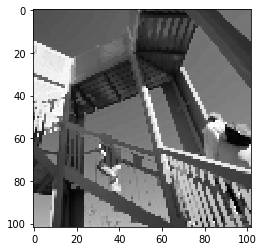

In [62]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

plt.imshow(img_pred, 
           cmap = 'gray')

In [63]:
#AVG Pooling
model = Sequential()
model.add(AvgPool2D(pool_size = (5, 5), 
                    input_shape = (512, 512, 1)))
model.compile('adam', 'mse')

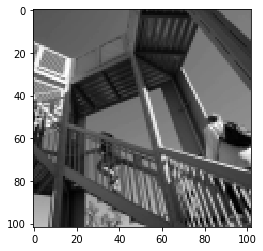

In [64]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, 
           cmap = 'gray')

## CNN classification example

#### Data

In [88]:
from keras.datasets import mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data('/tmp/mnist.npz')

#### Normalizing and reshaping

In [89]:
X_train.shape

(60000, 28, 28)

In [90]:
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32') / 255.0

In [91]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

#### Adding classes to the imgs for classification

In [92]:
from keras.utils.np_utils import to_categorical

In [93]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [94]:
X_train.shape

(60000, 28, 28, 1)

#### Model

In [99]:
from keras.layers import Flatten, Activation

K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1))) #Conv2D(32 filters,(each filter 3x3) 
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten()) #flatten the tensor to array

model.add(Dense(128, activation = 'relu')) #Fully-connected layer

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

#### Training

In [100]:
model.fit(X_train, y_train_cat, batch_size = 128,epochs = 2, verbose = 1, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 26s 617us/step - loss: 0.2493 - accuracy: 0.9232 - val_loss: 0.1579 - val_accuracy: 0.9466
Epoch 2/2
42000/42000 [==============================] - 25s 607us/step - loss: 0.0655 - accuracy: 0.9805 - val_loss: 0.0889 - val_accuracy: 0.9731


#### Evaluation

In [101]:
evaluated = model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 2s 171us/step


In [102]:
evaluated[1] * 100

97.54999876022339